In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

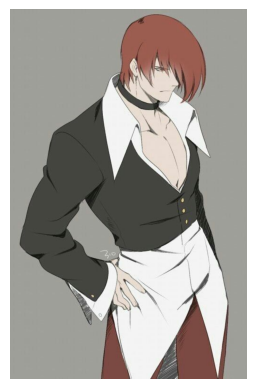

In [3]:
img = plt.imread("IoriYagami.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

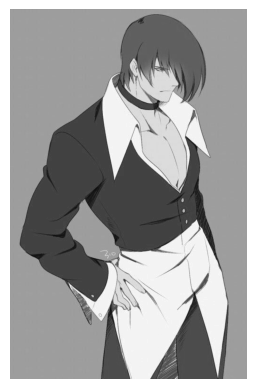

In [4]:
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')
plt.axis("off")
plt.show()

In [5]:
lowpassfilter = np.array([0.7, 0.7])
highpassfilter = np.array([-0.7, 0.7])
low = np.zeros((gray_img.shape[0]*2,gray_img.shape[1]), dtype=float)
high = np.zeros((gray_img.shape[0]*2,gray_img.shape[1]), dtype=float)
hasil = np.zeros((gray_img.shape[0]*2,gray_img.shape[1]*2), dtype=float)

In [6]:
newl = np.zeros((gray_img.shape[0], gray_img.shape[1]//2), dtype=float)
newh = np.zeros((gray_img.shape[0], gray_img.shape[1]//2), dtype=float)
newll = np.zeros((newl.shape[0]//2, newl.shape[1]), dtype=float)
newlh = np.zeros((newl.shape[0]//2, newl.shape[1]), dtype=float)
newhl = np.zeros((newl.shape[0]//2, newl.shape[1]), dtype=float)
newhh = np.zeros((newl.shape[0]//2, newl.shape[1]), dtype=float)

In [7]:
for i in range(0,gray_img.shape[0],1):
    for j in range(0,gray_img.shape[1],2):
        newl[i,j//2] = (gray_img[i,j]*lowpassfilter[0]+gray_img[i,j+1]*lowpassfilter[1])/2
        newh[i,j//2] = (gray_img[i,j]*highpassfilter[0]+gray_img[i,j+1]*highpassfilter[1])/2

In [8]:
for i in range(0,newl.shape[0],2):
    for j in range(0,newl.shape[1],1):
        newll[i//2,j] = (newl[i,j]*lowpassfilter[0]+newl[i+1,j]*lowpassfilter[1])/2
        newlh[i//2,j] = (newl[i,j]*highpassfilter[0]+newl[i+1,j]*highpassfilter[1])/2
        newhl[i//2,j] = (newh[i,j]*lowpassfilter[0]+newh[i+1,j]*lowpassfilter[1])/2
        newhh[i//2,j] = (newh[i,j]*highpassfilter[0]+newh[i+1,j]*highpassfilter[1])/2

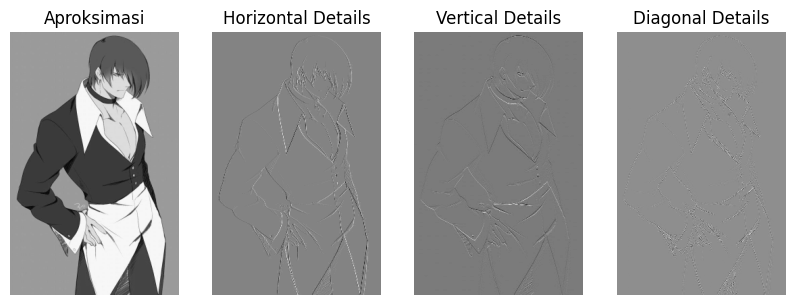

In [9]:
plt.figure(figsize=(10,10))

plt.subplot(1,4,1)
plt.imshow(newll, cmap='gray')
plt.title('Aproksimasi')
plt.axis("off")
plt.subplot(1,4,2)
plt.imshow(newhl, cmap='gray')
plt.title('Horizontal Details')
plt.axis("off")
plt.subplot(1,4,3)
plt.imshow(newlh, cmap='gray')
plt.title('Vertical Details')
plt.axis("off")
plt.subplot(1,4,4)
plt.imshow(newhh, cmap='gray')
plt.title('Diagonal Details')
plt.axis("off")
plt.show()

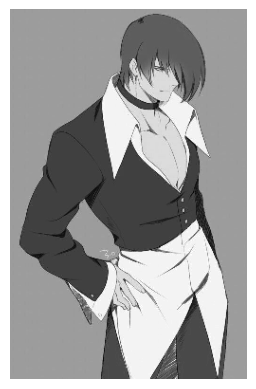

In [11]:
def merge(newll, newhl, newlh, newhh):
    hasilGabungan = newll + newhl + newlh + newhh
    return hasilGabungan

citraHasil = merge(newll, newhl, newlh, newhh)

plt.imshow(citraHasil, cmap='gray')
plt.axis("off")
plt.show()